# Installations Required

In [ ]:
!pip install PyPDF2
!pip install langchain-experimental
!pip install langchain_openai
!pip install groq langchain-groq
!pip install sentence-transformers --quiet
!pip install langchain-groq
!pip install chromadb
!pip install faiss-cpu
!pip install pandas
!pip install numpy
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Unins

# Create and Store Chunks as CSV files

In [ ]:
import csv
from langchain_experimental.text_splitter import SemanticChunker
from langchain.embeddings import HuggingFaceEmbeddings
import PyPDF2
from langchain_experimental.text_splitter import SemanticChunker


# Function to read and extract text from PDFs based on a list of file paths
def read_pdfs_from_list(pdf_file_paths):
    documents = []
    for pdf_file in pdf_file_paths:
        with open(pdf_file, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            pdf_text = ""
            for page in reader.pages:
                pdf_text += page.extract_text()
            documents.append(pdf_text)
    return documents

# Function to process and store chunks and embeddings into a CSV file for a specific embedding model
def process_and_store_chunks(pdf_file_paths, output_csv_file, embed_model):
    documents = read_pdfs_from_list(pdf_file_paths)
    semantic_chunker = SemanticChunker(embed_model, breakpoint_threshold_type="percentile")
    # Open CSV file for writing
    with open(output_csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["doc_id", "chunk_id", "chunk_text", "embedding"])

        for doc_id, document in enumerate(documents):
            # Assuming SemanticChunker is used here
            semantic_chunks = semantic_chunker.create_documents([document])

            for i, semantic_chunk in enumerate(semantic_chunks):
                chunk_text = semantic_chunk.page_content
                chunk_embedding = embed_model.embed_query(chunk_text)

                # Convert embedding list to a string format
                embedding_str = ",".join(map(str, chunk_embedding))

                # Write to the CSV
                writer.writerow([doc_id, i, chunk_text, embedding_str])

                print(f"Stored chunk {i} from document {doc_id} with text: {chunk_text[:50]}...")

# Example: Processing with SBERT
embed_model_sbert = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
process_and_store_chunks(["/content/Atomic Habits by James Clear.pdf", "/content/Power of The Subconscious Mind - Joseph Murphy.pdf", "/content/Think and Grow Rich by Napoleon Hill.pdf"], "chunk_embeddings_sbert.csv", embed_model_sbert)

# Example: Processing with BAAI/bge-base-en-v1.5
embed_model_bge = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")
process_and_store_chunks(["/content/Atomic Habits by James Clear.pdf", "/content/Power of The Subconscious Mind - Joseph Murphy.pdf", "/content/Think and Grow Rich by Napoleon Hill.pdf"], "chunk_embeddings_bge.csv", embed_model_bge)


<ipython-input-1-cafdb80b2125>:46: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model_sbert = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, creat

Stored chunk 0 from document 0 with text: AN	IMPRINT	OF	
P
ENGUIN	
R
AND
OM	
H
OUSE	
LLC
375...
Stored chunk 1 from document 0 with text: Version_1a·tom·ic
əˈ
tämik
1
. an	extremely	small	...
Stored chunk 2 from document 0 with text: hab·it
ˈ
hab
ə
t
1
. a	routine	or	practice	perform...
Stored chunk 3 from document 0 with text: As	my	classmate	took	a	full	swing,	the
bat	slipped...
Stored chunk 4 from document 0 with text: I	have	no	memory	of	the	moment	of
impact. The	bat	...
Stored chunk 5 from document 0 with text: The	only	way	I	made	progress—the	only	choice	I	had...
Stored chunk 6 from document 0 with text: Anything	wise	in
these	pages	you	should	credit	to	...
Stored chunk 7 from document 0 with text: Brailsford	and	his	team	continued	to	find
1	percen...
Stored chunk 8 from document 0 with text: Unfortunately,	the	slow	pace	of	transformation	als...
Stored chunk 9 from document 0 with text: Are	you	reading	books	and	learning	something	new
e...
Stored chunk 10 from document 0 with tex

# FAISS Retrieval with SBERT/BAAI

In [ ]:
import faiss
import numpy as np
import pandas as pd
import psutil
import time
from langchain.embeddings import HuggingFaceEmbeddings

# Global variables to keep track of the current FAISS index and dataframe
faiss_index = None
chunks_df = None

# Function to load CSV and create FAISS index for a specific embedding model
def load_csv_and_create_faiss_index(csv_file):
    global faiss_index, chunks_df
    # Read CSV file
    chunks_df = pd.read_csv(csv_file)

    # Extract the embeddings and convert them into a NumPy array of floats
    embeddings = chunks_df['embedding'].apply(lambda x: np.fromstring(x, sep=',')).values
    embeddings = np.vstack(embeddings).astype('float32')  # Stack into a 2D array

    # Get the dimension of the embeddings
    embedding_dim = embeddings.shape[1]

    # Create a new FAISS index with the correct dimension
    faiss_index = faiss.IndexFlatL2(embedding_dim)
    faiss_index.add(embeddings)

# Function to retrieve top 10 chunks using FAISS and track time, memory, and similarity scores
def retrieve_chunk(query, embed_model, csv_file_path, threshold=0.0):
    global faiss_index, chunks_df

    # Always load the CSV and recreate the FAISS index for each model
    load_csv_and_create_faiss_index(csv_file_path)

    process = psutil.Process()
    memory_before = process.memory_info().rss / 1024 ** 2  # Memory in MB

    # Encode query
    query_embedding = embed_model.embed_query(query)
    query_embedding = np.array([query_embedding], dtype=np.float32)

    # Ensure the query embedding matches FAISS index dimension
    assert query_embedding.shape[1] == faiss_index.d, f"Query embedding dimension {query_embedding.shape[1]} does not match FAISS index dimension {faiss_index.d}"

    # Measure retrieval time
    start_time = time.time()
    distances, indices = faiss_index.search(query_embedding, k=10)  # Retrieve top 10 documents
    retrieval_time = time.time() - start_time

    memory_after = process.memory_info().rss / 1024 ** 2
    memory_used = memory_after - memory_before

    # Collect top 10 results with similarity scores
    retrieved_chunks = []
    for i in range(10):
        closest_chunk = chunks_df.iloc[indices[0][i]]['chunk_text']
        closest_distance = distances[0][i]
        similarity_score = 1 / (1 + closest_distance)

        if similarity_score >= threshold:
            retrieved_chunks.append({
                "chunk_text": closest_chunk,
                "similarity_score": similarity_score
            })

    return {
        "retrieved_chunks": retrieved_chunks,
        "retrieval_time": retrieval_time,
        "memory_usage": memory_used
    }
query = " How the subconscious controls all functions of the body?"


# Example: Retrieving with SBERT
embed_model_sbert = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
csv_file_sbert = "chunk_embeddings_sbert.csv"
faiss_result_sbert = retrieve_chunk(query=query, embed_model=embed_model_sbert, csv_file_path=csv_file_sbert)
print(len(faiss_result_sbert["retrieved_chunks"]))
print(f"FAISS + SBERT Result: {faiss_result_sbert}")

# Example: Retrieving with BAAI
embed_model_bge = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")
csv_file_bge = "chunk_embeddings_bge.csv"
faiss_result_bge = retrieve_chunk(query=query, embed_model=embed_model_bge, csv_file_path=csv_file_bge)
print(len(faiss_result_bge["retrieved_chunks"]))
print(f"FAISS + BAAI Result: {faiss_result_bge}")



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


10
FAISS + SBERT Result: {'retrieved_chunks': [{'chunk_text': '. Marvelous are thy works; and that my soul [subconscious \nmind] knoweth right well. PSALM 139:14. • How the subconscious controls all functions of the body \nWhile you are awake or sound asleep upon your bed, the ceaseless , \ntireless action of your subconscious mind controls all the vit al \nfunctions of your body without the help of your con-scious mind. For \nexample, while you are asleep your heart con-tinues to beat \nrhythmically, your lungs do not rest, and the proc-ess of inhalation \nand exhalation, whereby your blood absorbs fresh air, goes on just the  \nsame as when you are awake. Your subconscious controls your \ndigestive processes and glandular secretions, as well as a ll the other \nmysterious operations of your body. The hair on your face continues \nto grow whether you are asleep or awake. Scientists tell us that the  \n 45  skin secretes much more perspiration during sleep than during t he \nwaking hou

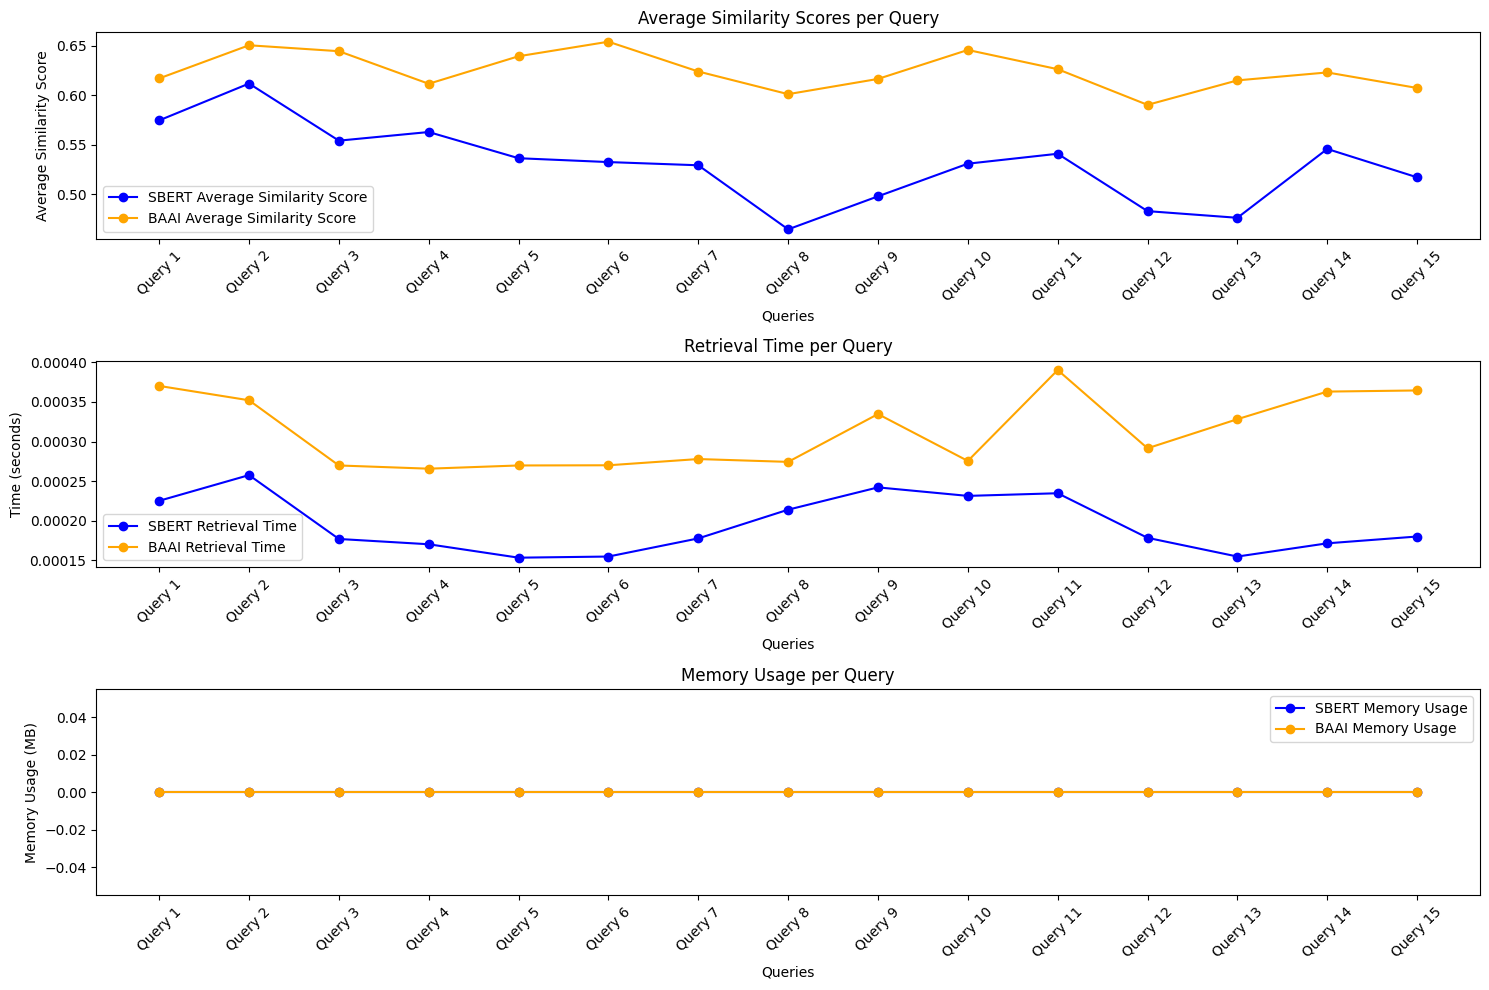

In [ ]:
import matplotlib.pyplot as plt

# List of queries to test
queries = [
    # Atomic Habits by James Clear
    "How can we build lasting habits that lead to long-term success?",
    "What role does the 'cue-routine-reward' cycle play in habit formation?",
    "How does identity influence the habits we develop?",
    "What are some ways to break bad habits effectively?",
    "How can we make habits more attractive to ensure consistency?",

    # The Power of Your Subconscious Mind by Joseph Murphy
    "How can we harness the power of the subconscious mind for personal growth?",
    "What techniques can be used to reprogram the subconscious mind?",
    "How does visualization impact our subconscious and influence success?",
    "What is the role of positive affirmations in influencing the subconscious?",
    "How can our subconscious mind improve health and well-being?",

    # Think and Grow Rich by Napoleon Hill
    "How does desire play a role in achieving financial success?",
    "What steps are necessary to turn dreams into actionable goals?",
    "How does the 'mastermind principle' contribute to personal achievement?",
    "How can we overcome fear to unlock potential for wealth?",
    "How does persistence impact success in the face of failure?"
]

# Function to run multiple queries and collect results
def run_queries_and_collect_results(queries, embed_model, csv_file_path):
    similarity_scores = []
    retrieval_times = []
    memory_usages = []

    for query in queries:
        # Run the retrieval function for each query
        result = retrieve_chunk(query=query, embed_model=embed_model, csv_file_path=csv_file_path)

        # Store top 10 similarity scores for analysis
        query_similarity_scores = [chunk["similarity_score"] for chunk in result["retrieved_chunks"]]
        similarity_scores.append(query_similarity_scores)

        # Store retrieval time and memory usage
        retrieval_times.append(result["retrieval_time"])
        memory_usages.append(result["memory_usage"])

    return {
        "similarity_scores": similarity_scores,
        "retrieval_times": retrieval_times,
        "memory_usages": memory_usages
    }

# Run queries and collect results for SBERT
sbert_results = run_queries_and_collect_results(queries, embed_model_sbert, csv_file_sbert)

# Run queries and collect results for BAAI
bge_results = run_queries_and_collect_results(queries, embed_model_bge, csv_file_bge)

# Function to calculate average similarity scores per query
def calculate_average_similarity(similarity_scores):
    return [sum(scores) / len(scores) if scores else 0 for scores in similarity_scores]

# Calculate average similarity scores for each query
average_similarity_scores_sbert = calculate_average_similarity(sbert_results["similarity_scores"])
average_similarity_scores_bge = calculate_average_similarity(bge_results["similarity_scores"])

# Prepare x-axis labels for queries
query_labels = [f"Query {i+1}" for i in range(len(queries))]

# Retrieve individual data
retrieval_times_sbert = sbert_results["retrieval_times"]
retrieval_times_bge = bge_results["retrieval_times"]
memory_usage_sbert = sbert_results["memory_usages"]
memory_usage_bge = bge_results["memory_usages"]

# Set up figure
plt.figure(figsize=(15, 10))

# Plot average similarity scores per query
plt.subplot(3, 1, 1)
plt.plot(query_labels, average_similarity_scores_sbert, label="SBERT Average Similarity Score", color="blue", marker='o')
plt.plot(query_labels, average_similarity_scores_bge, label="BAAI Average Similarity Score", color="orange", marker='o')
plt.title("Average Similarity Scores per Query")
plt.xlabel("Queries")
plt.ylabel("Average Similarity Score")
plt.xticks(rotation=45)
plt.legend()

# Plot retrieval times per query
plt.subplot(3, 1, 2)
plt.plot(query_labels, retrieval_times_sbert, label="SBERT Retrieval Time", color="blue", marker='o')
plt.plot(query_labels, retrieval_times_bge, label="BAAI Retrieval Time", color="orange", marker='o')
plt.title("Retrieval Time per Query")
plt.xlabel("Queries")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.legend()

# Plot memory usage per query
plt.subplot(3, 1, 3)
plt.plot(query_labels, memory_usage_sbert, label="SBERT Memory Usage", color="blue", marker='o')
plt.plot(query_labels, memory_usage_bge, label="BAAI Memory Usage", color="orange", marker='o')
plt.title("Memory Usage per Query")
plt.xlabel("Queries")
plt.ylabel("Memory Usage (MB)")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# Reranking using BinaryCrossEncoder and CosineSimilarity for FAISS retrieval.

In [ ]:
from sentence_transformers import CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to rerank retrieved chunks using a cross-encoder
def rerank_chunks_with_cross_encoder(query, retrieved_chunks, reranker_model):
    # Prepare input for the cross-encoder model
    inputs = [(query, chunk['chunk_text']) for chunk in retrieved_chunks]

    # Compute scores using the cross-encoder
    scores = reranker_model.predict(inputs)

    # Attach scores and sort chunks based on these scores
    for i, chunk in enumerate(retrieved_chunks):
        chunk['rerank_score'] = scores[i]

    # Sort the chunks by rerank score in descending order (higher score is better)
    reranked_chunks = sorted(retrieved_chunks, key=lambda x: x['rerank_score'], reverse=True)

    return reranked_chunks

# Function to rerank retrieved chunks using cosine similarity
def rerank_chunks_with_cosine_similarity(query_embedding, retrieved_chunks, embed_model):
    # Encode all chunks using the embedding model
    chunk_embeddings = np.array([embed_model.embed_query(chunk['chunk_text']) for chunk in retrieved_chunks])
    query_embedding = np.array([query_embedding])

    # Compute cosine similarities
    similarities = cosine_similarity(query_embedding, chunk_embeddings)[0]

    # Attach scores and sort chunks based on cosine similarity
    for i, chunk in enumerate(retrieved_chunks):
        chunk['cosine_similarity_score'] = similarities[i]

    # Sort the chunks by cosine similarity score in descending order
    reranked_chunks = sorted(retrieved_chunks, key=lambda x: x['cosine_similarity_score'], reverse=True)

    return reranked_chunks

# Load a cross-encoder model for reranking
reranker_model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Encode the query for cosine similarity
query_embedding_sbert = embed_model_sbert.embed_query(query)
query_embedding_bge = embed_model_bge.embed_query(query)

# Rerank using CrossEncoder for SBERT results
reranked_sbert_cross = rerank_chunks_with_cross_encoder(query, faiss_result_sbert['retrieved_chunks'], reranker_model)

# Rerank using cosine similarity for SBERT results
reranked_sbert_cosine = rerank_chunks_with_cosine_similarity(query_embedding_sbert, faiss_result_sbert['retrieved_chunks'], embed_model_sbert)

# Rerank using CrossEncoder for BAAI results
reranked_bge_cross = rerank_chunks_with_cross_encoder(query, faiss_result_bge['retrieved_chunks'], reranker_model)

# Rerank using cosine similarity for BAAI results
reranked_bge_cosine = rerank_chunks_with_cosine_similarity(query_embedding_bge, faiss_result_bge['retrieved_chunks'], embed_model_bge)

# Display the results for SBERT
print("Top reranked chunks (SBERT - CrossEncoder):")
for i, chunk in enumerate(reranked_sbert_cross[:10]):
    print(f"{i + 1}. {chunk['chunk_text']} (Rerank Score: {chunk['rerank_score']:.4f})")

print("\nTop reranked chunks (SBERT - Cosine Similarity):")
for i, chunk in enumerate(reranked_sbert_cosine[:10]):
    print(f"{i + 1}. {chunk['chunk_text']} (Cosine Similarity Score: {chunk['cosine_similarity_score']:.4f})")

# Display the results for BAAI
print("\nTop reranked chunks (BAAI - CrossEncoder):")
for i, chunk in enumerate(reranked_bge_cross[:10]):
    print(f"{i + 1}. {chunk['chunk_text']} (Rerank Score: {chunk['rerank_score']:.4f})")

print("\nTop reranked chunks (BAAI - Cosine Similarity):")
for i, chunk in enumerate(reranked_bge_cosine[:10]):
    print(f"{i + 1}. {chunk['chunk_text']} (Cosine Similarity Score: {chunk['cosine_similarity_score']:.4f})")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Top reranked chunks (SBERT - CrossEncoder):
1. . Marvelous are thy works; and that my soul [subconscious 
mind] knoweth right well. PSALM 139:14. • How the subconscious controls all functions of the body 
While you are awake or sound asleep upon your bed, the ceaseless , 
tireless action of your subconscious mind controls all the vit al 
functions of your body without the help of your con-scious mind. For 
example, while you are asleep your heart con-tinues to beat 
rhythmically, your lungs do not rest, and the proc-ess of inhalation 
and exhalation, whereby your blood absorbs fresh air, goes on just the  
same as when you are awake. Your subconscious controls your 
digestive processes and glandular secretions, as well as a ll the other 
mysterious operations of your body. The hair on your face continues 
to grow whether you are asleep or awake. Scientists tell us that the  
 45  skin secretes much more perspiration during sleep than during t he 
waking hours. Your eyes, ears, and othe

In [ ]:
result_sbert = reranked_sbert_cross[0]['chunk_text']
# result_sbert = reranked_sbert_cosine[0]['chunk_text']
print(result_sbert)
result_bge = reranked_bge_cross[0]['chunk_text']
# result_bge = reranked_bge_cosine[0]['chunk_text']
print(result_bge)

. Marvelous are thy works; and that my soul [subconscious 
mind] knoweth right well. PSALM 139:14. • How the subconscious controls all functions of the body 
While you are awake or sound asleep upon your bed, the ceaseless , 
tireless action of your subconscious mind controls all the vit al 
functions of your body without the help of your con-scious mind. For 
example, while you are asleep your heart con-tinues to beat 
rhythmically, your lungs do not rest, and the proc-ess of inhalation 
and exhalation, whereby your blood absorbs fresh air, goes on just the  
same as when you are awake. Your subconscious controls your 
digestive processes and glandular secretions, as well as a ll the other 
mysterious operations of your body. The hair on your face continues 
to grow whether you are asleep or awake. Scientists tell us that the  
 45  skin secretes much more perspiration during sleep than during t he 
waking hours. Your eyes, ears, and other senses are active during sleep. Fo r 
instanc

# ChromaDb Retrieval with SBERT/BAAI

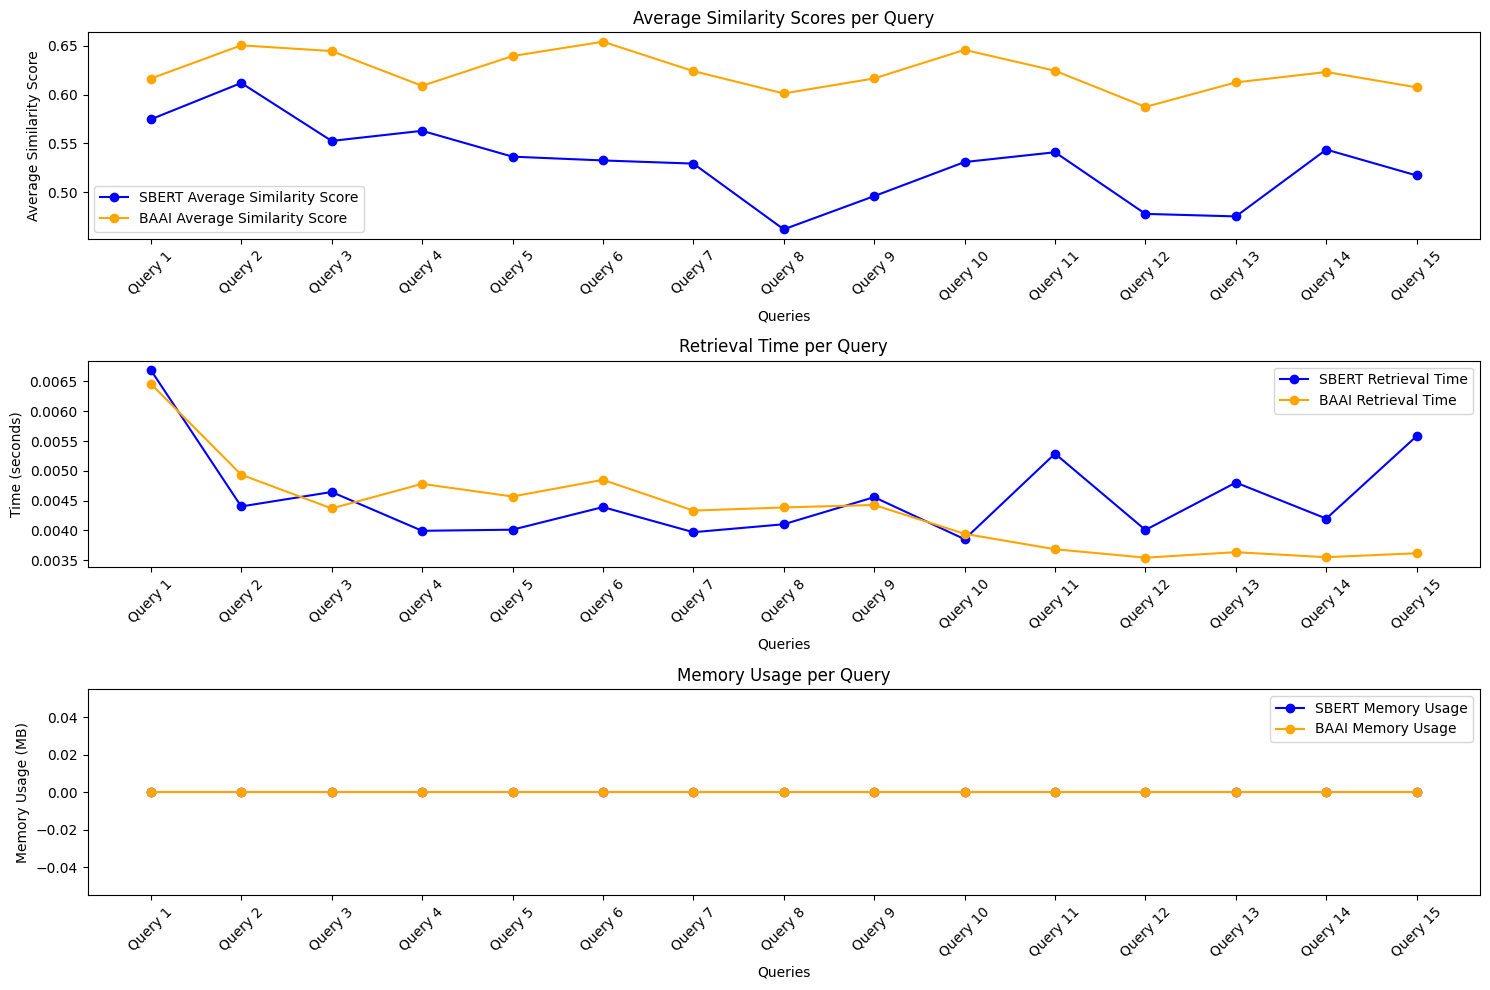

In [ ]:
import chromadb
from langchain.embeddings import HuggingFaceEmbeddings
import numpy as np
import psutil
import time
import pandas as pd
import matplotlib.pyplot as plt

# Initialize ChromaDB client
client = chromadb.Client()

# Function to create or get a ChromaDB collection
def create_or_get_chroma_collection(collection_name):
    collection = client.get_or_create_collection(collection_name)
    return collection

# Function to load chunks from CSV and store embeddings in ChromaDB
def store_embeddings_in_chroma(collection, csv_file_path, embed_model):
    chunks_df = pd.read_csv(csv_file_path)

    for idx, row in chunks_df.iterrows():
        chunk_text = row['chunk_text']
        embedding = embed_model.embed_query(chunk_text)
        # Add document, embedding, and ID
        collection.add(
            documents=[chunk_text],
            embeddings=[embedding],
            metadatas=[{"chunk_id": idx}],
            ids=[str(idx)]  # Generate unique IDs for each chunk
        )
    print(f"Stored embeddings in ChromaDB for collection: {collection.name}")

# Function to retrieve top 10 chunks with ChromaDB, measure time and memory usage
def retrieve_top_chunks_chromadb(query, collection, embed_model, top_k=10, threshold=0.0):
    process = psutil.Process()
    memory_before = process.memory_info().rss / 1024 ** 2  # Memory in MB

    # Encode query embedding
    query_embedding = embed_model.embed_query(query)

    # Measure retrieval time
    start_time = time.time()
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_k  # Retrieve top 10 chunks
    )
    retrieval_time = time.time() - start_time

    memory_after = process.memory_info().rss / 1024 ** 2
    memory_used = memory_after - memory_before

    # Collect and format the top 10 results
    retrieved_chunks = []
    for i in range(top_k):
        if results['documents'] and len(results['documents'][0]) > i:
            retrieved_chunk = results['documents'][0][i]
            similarity_score = results['distances'][0][i]  # Lower distance means higher similarity
            formatted_score = 1 / (1 + similarity_score)
            if formatted_score >= threshold:
                retrieved_chunks.append({
                    "chunk_text": retrieved_chunk,
                    "similarity_score": formatted_score
                })

    return {
        "retrieved_chunks": retrieved_chunks,
        "retrieval_time": retrieval_time,
        "memory_usage": memory_used
    }

# Initialize embedding models
# embed_model_sbert = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
# embed_model_bge = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")

# Store SBERT embeddings in ChromaDB
# collection_sbert = create_or_get_chroma_collection(collection_name="sbert_collection")
# store_embeddings_in_chroma(collection_sbert, csv_file_path="chunk_embeddings_sbert.csv", embed_model=embed_model_sbert)

# Store BAAI embeddings in ChromaDB
# collection_bge = create_or_get_chroma_collection(collection_name="bge_collection")
# store_embeddings_in_chroma(collection_bge, csv_file_path="chunk_embeddings_bge.csv", embed_model=embed_model_bge)

# List of queries to test
queries = [
    # Atomic Habits by James Clear
    "How can we build lasting habits that lead to long-term success?",
    "What role does the 'cue-routine-reward' cycle play in habit formation?",
    "How does identity influence the habits we develop?",
    "What are some ways to break bad habits effectively?",
    "How can we make habits more attractive to ensure consistency?",

    # The Power of Your Subconscious Mind by Joseph Murphy
    "How can we harness the power of the subconscious mind for personal growth?",
    "What techniques can be used to reprogram the subconscious mind?",
    "How does visualization impact our subconscious and influence success?",
    "What is the role of positive affirmations in influencing the subconscious?",
    "How can our subconscious mind improve health and well-being?",

    # Think and Grow Rich by Napoleon Hill
    "How does desire play a role in achieving financial success?",
    "What steps are necessary to turn dreams into actionable goals?",
    "How does the 'mastermind principle' contribute to personal achievement?",
    "How can we overcome fear to unlock potential for wealth?",
    "How does persistence impact success in the face of failure?"
]

# Function to run multiple queries and collect results
def run_queries_and_collect_results(queries, collection, embed_model):
    similarity_scores = []
    retrieval_times = []
    memory_usages = []

    for query in queries:
        # Run the retrieval function for each query
        result = retrieve_top_chunks_chromadb(query=query, collection=collection, embed_model=embed_model)

        # Store top 10 similarity scores for analysis
        query_similarity_scores = [chunk["similarity_score"] for chunk in result["retrieved_chunks"]]
        similarity_scores.append(query_similarity_scores)

        # Store retrieval time and memory usage
        retrieval_times.append(result["retrieval_time"])
        memory_usages.append(result["memory_usage"])

    return {
        "similarity_scores": similarity_scores,
        "retrieval_times": retrieval_times,
        "memory_usages": memory_usages
    }

# Run queries and collect results for SBERT
sbert_results = run_queries_and_collect_results(queries, collection_sbert, embed_model_sbert)

# Run queries and collect results for BAAI
bge_results = run_queries_and_collect_results(queries, collection_bge, embed_model_bge)

# Function to calculate average similarity scores per query
def calculate_average_similarity(similarity_scores):
    return [sum(scores) / len(scores) if scores else 0 for scores in similarity_scores]

# Calculate average similarity scores for each query
average_similarity_scores_sbert = calculate_average_similarity(sbert_results["similarity_scores"])
average_similarity_scores_bge = calculate_average_similarity(bge_results["similarity_scores"])

# Prepare x-axis labels for queries
query_labels = [f"Query {i+1}" for i in range(len(queries))]

# Retrieve individual data
retrieval_times_sbert = sbert_results["retrieval_times"]
retrieval_times_bge = bge_results["retrieval_times"]
memory_usage_sbert = sbert_results["memory_usages"]
memory_usage_bge = bge_results["memory_usages"]

# Set up figure
plt.figure(figsize=(15, 10))

# Plot average similarity scores per query
plt.subplot(3, 1, 1)
plt.plot(query_labels, average_similarity_scores_sbert, label="SBERT Average Similarity Score", color="blue", marker='o')
plt.plot(query_labels, average_similarity_scores_bge, label="BAAI Average Similarity Score", color="orange", marker='o')
plt.title("Average Similarity Scores per Query")
plt.xlabel("Queries")
plt.ylabel("Average Similarity Score")
plt.xticks(rotation=45)
plt.legend()

# Plot retrieval times per query
plt.subplot(3, 1, 2)
plt.plot(query_labels, retrieval_times_sbert, label="SBERT Retrieval Time", color="blue", marker='o')
plt.plot(query_labels, retrieval_times_bge, label="BAAI Retrieval Time", color="orange", marker='o')
plt.title("Retrieval Time per Query")
plt.xlabel("Queries")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.legend()

# Plot memory usage per query
plt.subplot(3, 1, 3)
plt.plot(query_labels, memory_usage_sbert, label="SBERT Memory Usage", color="blue", marker='o')
plt.plot(query_labels, memory_usage_bge, label="BAAI Memory Usage", color="orange", marker='o')
plt.title("Memory Usage per Query")
plt.xlabel("Queries")
plt.ylabel("Memory Usage (MB)")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# Reranking using BinaryCrossEncoder and CosineSimilarity forChromaDb retrieval.

In [ ]:
from sentence_transformers import CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize CrossEncoder for reranking
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Reranking function using CrossEncoder
def rerank_with_cross_encoder(query, retrieved_chunks):
    # Prepare pairs for CrossEncoder
    pairs = [[query, chunk['chunk_text']] for chunk in retrieved_chunks]

    # Compute scores with CrossEncoder
    scores = cross_encoder.predict(pairs)

    # Attach scores to chunks and sort by CrossEncoder scores
    reranked_chunks = [
        {"chunk_text": chunk['chunk_text'], "similarity_score": score}
        for chunk, score in zip(retrieved_chunks, scores)
    ]
    reranked_chunks.sort(key=lambda x: x['similarity_score'], reverse=True)  # Higher score is more relevant

    return reranked_chunks

# Reranking function using cosine similarity
def rerank_with_cosine_similarity(query_embedding, retrieved_chunks, embed_model):
    # Encode all chunks using the embedding model for cosine similarity comparison
    chunk_embeddings = np.array([embed_model.embed_query(chunk['chunk_text']) for chunk in retrieved_chunks])
    query_embedding = np.array([query_embedding])

    # Calculate cosine similarities
    similarities = cosine_similarity(query_embedding, chunk_embeddings)[0]

    # Attach cosine similarity scores to chunks and sort
    reranked_chunks = [
        {"chunk_text": chunk['chunk_text'], "similarity_score": sim}
        for chunk, sim in zip(retrieved_chunks, similarities)
    ]
    reranked_chunks.sort(key=lambda x: x['similarity_score'], reverse=True)  # Higher score is more relevant

    return reranked_chunks

# Example: Applying reranking on retrieved results for SBERT and BAAI models
query = "What is the Plateau of Latent Potential?"
query_embedding_sbert = embed_model_sbert.embed_query(query)  # For cosine reranking (SBERT)
query_embedding_bge = embed_model_bge.embed_query(query)  # For cosine reranking (BAAI)

# Initial retrieval using ChromaDB for SBERT and BAAI
result_sbert = retrieve_top_chunks_chromadb(query, collection_sbert, embed_model_sbert, top_k=10)
result_bge = retrieve_top_chunks_chromadb(query, collection_bge, embed_model_bge, top_k=10)

# Rerank using CrossEncoder for both models
reranked_sbert_cross = rerank_with_cross_encoder(query, result_sbert["retrieved_chunks"])
reranked_bge_cross = rerank_with_cross_encoder(query, result_bge["retrieved_chunks"])

# Rerank using Cosine Similarity for both models
reranked_sbert_cosine = rerank_with_cosine_similarity(query_embedding_sbert, result_sbert["retrieved_chunks"], embed_model_sbert)
reranked_bge_cosine = rerank_with_cosine_similarity(query_embedding_bge, result_bge["retrieved_chunks"], embed_model_bge)

# Display results for SBERT
print("CrossEncoder Reranked Results (SBERT):")
for idx, chunk in enumerate(reranked_sbert_cross):
    print(f"{idx + 1}. {chunk['chunk_text']} (Score: {chunk['similarity_score']:.4f})")

print("\nCosine Similarity Reranked Results (SBERT):")
for idx, chunk in enumerate(reranked_sbert_cosine):
    print(f"{idx + 1}. {chunk['chunk_text']} (Score: {chunk['similarity_score']:.4f})")

# Display results for BAAI
print("\nCrossEncoder Reranked Results (BAAI):")
for idx, chunk in enumerate(reranked_bge_cross):
    print(f"{idx + 1}. {chunk['chunk_text']} (Score: {chunk['similarity_score']:.4f})")

print("\nCosine Similarity Reranked Results (BAAI):")
for idx, chunk in enumerate(reranked_bge_cosine):
    print(f"{idx + 1}. {chunk['chunk_text']} (Score: {chunk['similarity_score']:.4f})")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CrossEncoder Reranked Results (SBERT):
1. In	the	early
and	middle	stages	of	any	quest,	there	is	often	a	Valley	of
Disappointment. You	expect	to	make	progress	in	a	linear	fashion	and
it’s	frustrating	how	ineffective	changes	can	seem	during	the	first	days,
weeks,	and	even	months. It	doesn’t	feel	like	you	are	going	anywhere. It’s	a	hallmark	of	any	compounding	process:	the	most	powerful
outcomes	are	delayed. This	is	one	of	the	core	reasons	why	it	is	so	hard	to	build	habits	that
last. People	make	a	few	small	changes,	fail	to	see	a	tangible	result,	and
decide	to	stop. You	think,	“I’ve	been	running	every	day	for	a	month,	so
why	can’t	I	see	any	change	in	my	body?”	Once	this	kind	of	thinkingtakes	over,	it’s	easy	to	let	good	habits	fall	by	the	wayside. But	in	order
to	make	a	meaningful	difference,	habits	need	to	persist	long	enough	to
break	through	this	plateau—what	I	call	the
	Plateau	of	Latent	Potential
. If	you	find	yourself	struggling	to	build	a	good	habit	or	break	a	bad
one,	it	is	not	becau

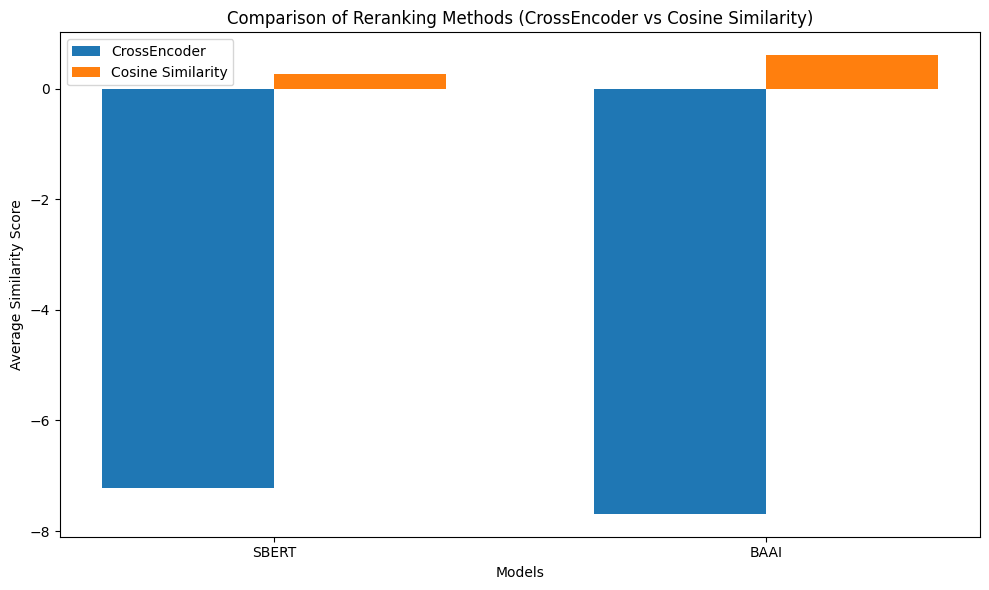

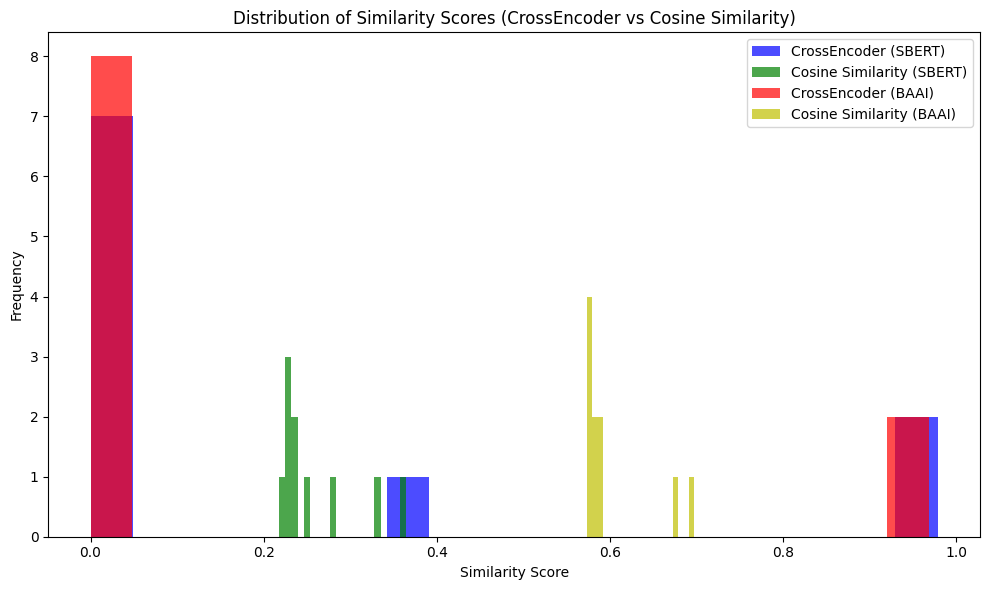

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit  # Sigmoid function for normalization

# Function to normalize CrossEncoder scores (if needed)
def normalize_cross_encoder_scores(cross_encoder_scores):
    return expit(np.array(cross_encoder_scores))  # Applying sigmoid to normalize

# Function to extract and calculate average scores for each reranking method
def calculate_average_scores(reranked_chunks_cross, reranked_chunks_cosine):
    cross_scores = [chunk['similarity_score'] for chunk in reranked_chunks_cross]
    cosine_scores = [chunk['similarity_score'] for chunk in reranked_chunks_cosine]

    avg_cross_score = np.mean(cross_scores)
    avg_cosine_score = np.mean(cosine_scores)

    return avg_cross_score, avg_cosine_score

# Normalize CrossEncoder scores (assuming they need normalization)
reranked_sbert_cross_normalized = normalize_cross_encoder_scores([chunk['similarity_score'] for chunk in reranked_sbert_cross])
reranked_bge_cross_normalized = normalize_cross_encoder_scores([chunk['similarity_score'] for chunk in reranked_bge_cross])

# Calculate average scores for SBERT and BAAI
avg_sbert_cross, avg_sbert_cosine = calculate_average_scores(reranked_sbert_cross, reranked_sbert_cosine)
avg_bge_cross, avg_bge_cosine = calculate_average_scores(reranked_bge_cross, reranked_bge_cosine)

# Prepare data for visualization
models = ['SBERT', 'BAAI']
cross_scores = [avg_sbert_cross, avg_bge_cross]
cosine_scores = [avg_sbert_cosine, avg_bge_cosine]

# Plotting the bar chart for average scores
x = np.arange(len(models))  # Label positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cross_scores, width, label='CrossEncoder')
bars2 = ax.bar(x + width/2, cosine_scores, width, label='Cosine Similarity')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Average Similarity Score')
ax.set_title('Comparison of Reranking Methods (CrossEncoder vs Cosine Similarity)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()

# Plotting score distributions using histograms for better comparison
plt.figure(figsize=(10, 6))
plt.hist(reranked_sbert_cross_normalized, bins=20, alpha=0.7, label="CrossEncoder (SBERT)", color='b')
plt.hist([chunk['similarity_score'] for chunk in reranked_sbert_cosine], bins=20, alpha=0.7, label="Cosine Similarity (SBERT)", color='g')
plt.hist(reranked_bge_cross_normalized, bins=20, alpha=0.7, label="CrossEncoder (BAAI)", color='r')
plt.hist([chunk['similarity_score'] for chunk in reranked_bge_cosine], bins=20, alpha=0.7, label="Cosine Similarity (BAAI)", color='y')

# Adding labels, title, and legend
plt.title("Distribution of Similarity Scores (CrossEncoder vs Cosine Similarity)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


# Choosing top ranked result.

In [ ]:
# result_sbert = reranked_sbert_cross[0]['chunk_text']
result_sbert = reranked_sbert_cosine[0]['chunk_text']
print(result_sbert)
# result_bge = reranked_bge_cross[0]['chunk_text']
result_bge = reranked_bge_cosine[0]['chunk_text']
print(result_bge)

Mastery	requires	patience. The	San	Antonio	Spurs,	one	of	the	most
successful	teams	in	NBA	history,	have	a	quote	from	social	reformer
Jacob	Riis	hanging	in	their	locker	room:	“When	nothing	seems	to	help,
I	go	and	look	at	a	stonecutter	hammering	away	at	his	rock,	perhaps	a
hundred	times	without	as	much	as	a	crack	showing	in	it. Yet	at	the
hundred	and	first	blow	it	will	split	in	two,	and	I	know	it	was	not	that
last	blow	that	did	it—but	all	that	had	gone	before.”
THE	PLATEAU	OF	LATENT	POTENTIALFIGURE	2:
	We	often	expect	progress	to	be	linear. At	the	very	least,	we	hope
it	will	come	quickly.
Mastery	requires	patience. The	San	Antonio	Spurs,	one	of	the	most
successful	teams	in	NBA	history,	have	a	quote	from	social	reformer
Jacob	Riis	hanging	in	their	locker	room:	“When	nothing	seems	to	help,
I	go	and	look	at	a	stonecutter	hammering	away	at	his	rock,	perhaps	a
hundred	times	without	as	much	as	a	crack	showing	in	it. Yet	at	the
hundred	and	first	blow	it	will	split	in	two,	and	I	know	it	was	not	

# Generation part

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# Define the userdata dictionary with your API key
userdata = {
    "GROQ_API_KEY": "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"  # Replace with your actual API key
}

# Initialize the chat model
chat_model = ChatGroq(
    temperature=0,
    model_name="mixtral-8x7b-32768",
    api_key=userdata.get("GROQ_API_KEY")
)

# RAG template
rag_template = """\
Use the following context to answer the user's query (Don't generate an answer on your own; use the provided context only and don't mention anything about the context you have been provided). If you cannot answer, please respond with 'I don't know'.

User's Query:
{question}

Context:
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(rag_template)

# Function to generate an answer based on the retrieved chunk and the user's query
def generate_answer(query, selected_chunk):
    # Create Runnables for context and question
    context_runnable = RunnablePassthrough()
    question_runnable = RunnablePassthrough()

    # Set the context and question to the Runnables
    context_runnable.invoke(selected_chunk)  # Pass the selected chunk
    question_runnable.invoke(query)  # Pass the user's query

    # Construct the chain
    semantic_rag_chain = (
        {"context": context_runnable, "question": question_runnable}
        | rag_prompt
        | chat_model
        | StrOutputParser()
    )

    # Generate and return the final answer
    answer = semantic_rag_chain.invoke({"context": selected_chunk, "question": query})
    return answer

# Generate answers using both contexts
final_answer_bge = generate_answer(query, result_bge)  # Pass your BGE chunk
final_answer_sbert = generate_answer(query, result_sbert)  # Pass your SBERT chunk

print(f"Final Answer using BGE:\n{final_answer_bge}")
print(f"Final Answer using SBERT:\n{final_answer_sbert}")


Final Answer using BGE:
The subconscious mind controls all the vital functions of the body, whether you are awake or asleep. These functions include the beating of your heart, the breathing of your lungs, the process of inhalation and exhalation, the digestive processes, glandular secretions, and the growth of hair, among other mysterious operations of the body. The subconscious mind continues to control these functions during sleep, and in some cases, it can even help in solving perplexing problems, as seen in the experiences of many great scientists. The conscious mind can sometimes interfere with the normal rhythm of these functions through worry, anxiety, fear, and depression. However, by speaking to the subconscious mind and commanding it to take over in peace, harmony, and divine order, one can restore the normal functioning of the body. The subconscious mind seeks to preserve life and health at all costs, and it can cause you to love children and preserve all life.
Final Answer 